## SQS

100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


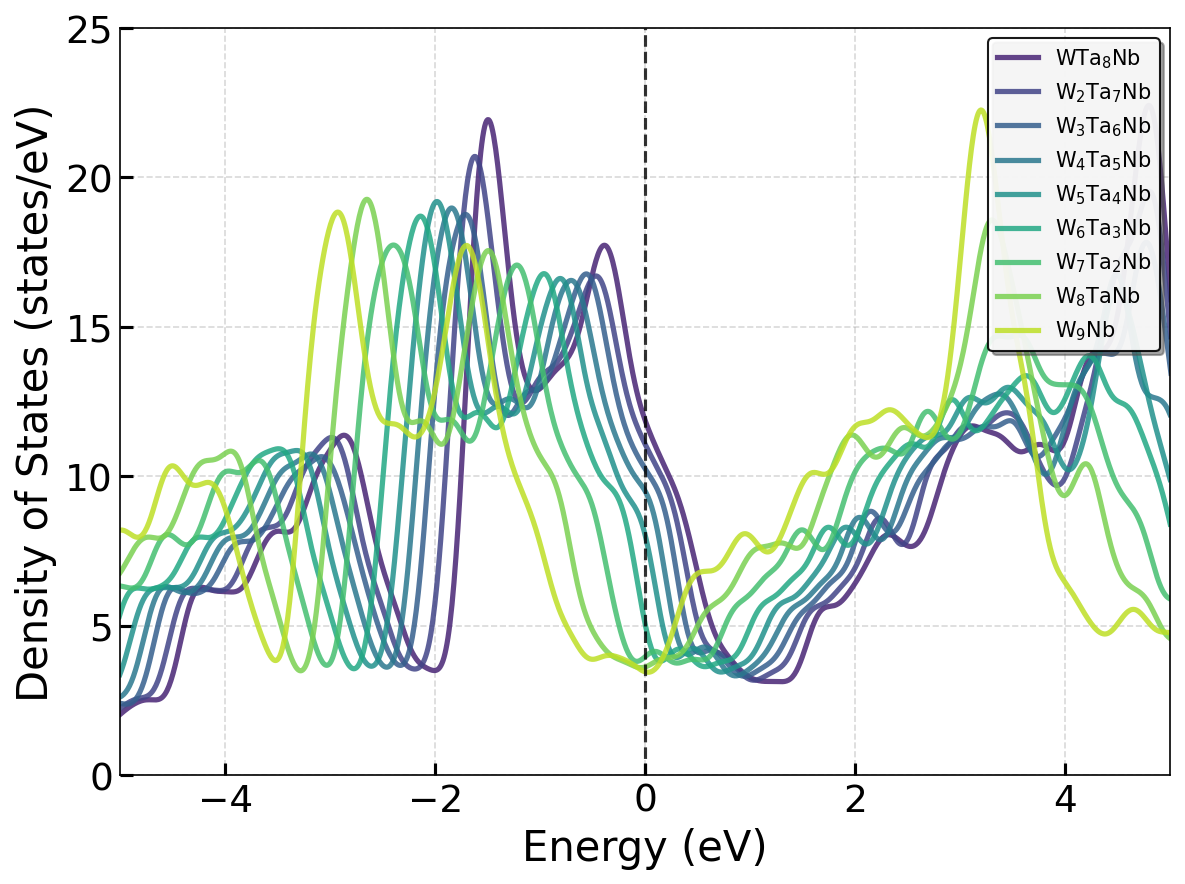

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from tqdm import tqdm

# Base directory and subfolders
base_dir = "../vasp_internal_elastic/sqs/elastic"
folders = ["nbw9", "tanbw8", "ta2nbw7", "ta3nbw6", "ta4nbw5", 
           "ta5nbw4", "ta6nbw3", "ta7nbw2", "ta8nbw"]

# Simple W fractions (just decreasing by 10 each step)
w_fractions = [90, 80, 70, 60, 50, 40, 30, 20, 10]

# Create mapping from folder names to proper chemical formulas with subscripts
folder_to_formula = {
    "nbw9": r"W$_9$Nb",
    "tanbw8": r"W$_8$TaNb", 
    "ta2nbw7": r"W$_7$Ta$_2$Nb",
    "ta3nbw6": r"W$_6$Ta$_3$Nb",
    "ta4nbw5": r"W$_5$Ta$_4$Nb",
    "ta5nbw4": r"W$_4$Ta$_5$Nb",
    "ta6nbw3": r"W$_3$Ta$_6$Nb",
    "ta7nbw2": r"W$_2$Ta$_7$Nb",
    "ta8nbw": r"WTa$_8$Nb"
}

# Initialize
plotter = DosPlotter(sigma=0.05, stack=False)
dos_at_fermi = []

# Loop through each folder once
for folder in tqdm(folders):
    vr_path = os.path.join(base_dir, folder, "vasprun.xml")
    if not os.path.exists(vr_path):
        print(f"⚠️ Missing {vr_path} — skipping")
        dos_at_fermi.append(np.nan)
        continue

    vr = Vasprun(vr_path, parse_potcar_file=False)
    tdos = vr.tdos
    plotter.add_dos(folder, tdos)  # add full DOS to global plot

    # Extract DOS at Ef
    efermi = tdos.efermi
    dos_dict = tdos.get_interpolated_value(efermi)
    dos_val = float(sum(float(v) for v in dos_dict.values()))
    dos_at_fermi.append(dos_val)

# Sort by W fraction
pairs = sorted(zip(w_fractions, dos_at_fermi), key=lambda x: x[0])
sqs_wf_sorted, sqs_dos_sorted = map(np.array, zip(*pairs))

# --------- Improved Plot with better colors and legend inside ---------
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

# Use matplotlib colormap for better colors
colors = cm.viridis(np.linspace(0.1, 0.9, len(folders)))

# Create a mapping of folder to W fraction for sorting
folder_w_map = dict(zip(folders, w_fractions))

# Sort folders by W fraction for consistent color mapping
sorted_folder_data = sorted([(folder, folder_w_map[folder]) for folder in folders], key=lambda x: x[1])
sorted_folders = [item[0] for item in sorted_folder_data]

# Plot each DOS manually with better control
for i, folder in enumerate(sorted_folders):
    vr_path = os.path.join(base_dir, folder, "vasprun.xml")
    if not os.path.exists(vr_path):
        continue
    
    # Reload the data for plotting
    vr = Vasprun(vr_path, parse_potcar_file=False)
    tdos = vr.tdos
    
    # Get the proper formula name for this folder
    formula_name = folder_to_formula[folder]
    
    # Plot with consistent color
    ax.plot(tdos.energies - tdos.efermi, tdos.densities[list(tdos.densities.keys())[0]], 
           color=colors[i], 
           linewidth=2.5, 
           label=formula_name,
           alpha=0.85)

# Styling
ax.set_xlabel("Energy (eV)", fontsize=20)
ax.set_ylabel("Density of States (states/eV)", fontsize=20)
ax.set_xlim(-5, 5)
ax.set_ylim(0, 25)
ax.axvline(0, color="black", linestyle="--", linewidth=1.5, alpha=0.8)
ax.tick_params(axis="both", which="major", labelsize=18, direction="in", width=1.5, length=6)
ax.grid(True, linestyle="--", alpha=0.3, color='gray')

# Legend inside plot (upper right corner)
ax.legend(fontsize=10, 
         loc="upper right", 
         frameon=True, 
         fancybox=True, 
         shadow=True,
         framealpha=0.9,
         edgecolor='black',
         facecolor='white')

plt.tight_layout()
plt.show()
# plt.savefig("all_dos_improved.png", dpi=300, bbox_inches="tight")

## Ordered

100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


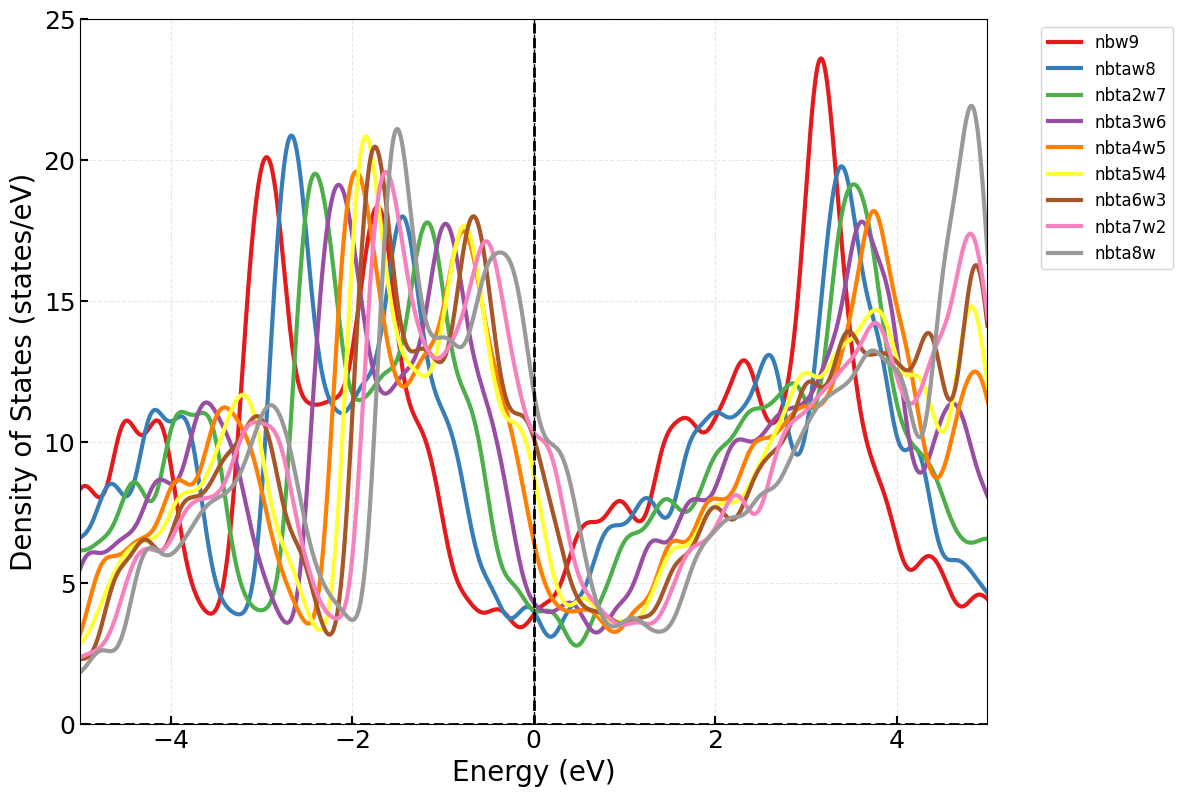

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from tqdm import tqdm

# Base directory and subfolders
base_dir = "../vasp_internal_elastic/ordered/elastic"
folders = ["nbta8w", "nbta7w2", "nbta6w3", "nbta5w4",
           "nbta4w5", "nbta3w6", "nbta2w7", "nbtaw8", "nbw9"]

# Corresponding tungsten fractions (atomic %)
w_fractions = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Initialize
plotter = DosPlotter(sigma=0.05, stack=False)
dos_at_fermi = []

# Loop once for everything
for folder in tqdm(folders):
    vr_path = os.path.join(base_dir, folder, "vasprun.xml")
    if not os.path.exists(vr_path):
        print(f"⚠️ Skipping {folder}, no vasprun.xml found")
        dos_at_fermi.append(np.nan)
        continue

    vr = Vasprun(vr_path, parse_potcar_file=False)
    tdos = vr.tdos

    # Add to global DOS plot
    plotter.add_dos(folder, tdos)

    # Extract DOS at Ef
    efermi = tdos.efermi
    dos_dict = tdos.get_interpolated_value(efermi)
    dos_val = float(sum(float(v) for v in dos_dict.values()))
    dos_at_fermi.append(dos_val)

# Sort by W fraction
pairs = sorted(zip(w_fractions, dos_at_fermi), key=lambda x: x[0])
ordered_wf_sorted, ordered_dos_sorted = map(np.array, zip(*pairs))

# --------- Plot 1: Total DOS ---------
fig1 = plotter.get_plot()
plt.xlabel("Energy (eV)", fontsize=20)
plt.ylabel("Density of States (states/eV)", fontsize=20)
plt.axvline(0, color="k", linestyle="--", linewidth=1)
plt.tick_params(axis="both", which="major", labelsize=18, direction="in", width=1.5, length=6)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.xlim(-5, 5)
plt.ylim(0, 25)
plt.show()
# plt.savefig("ordered_all_dos.png", dpi=300, bbox_inches="tight")

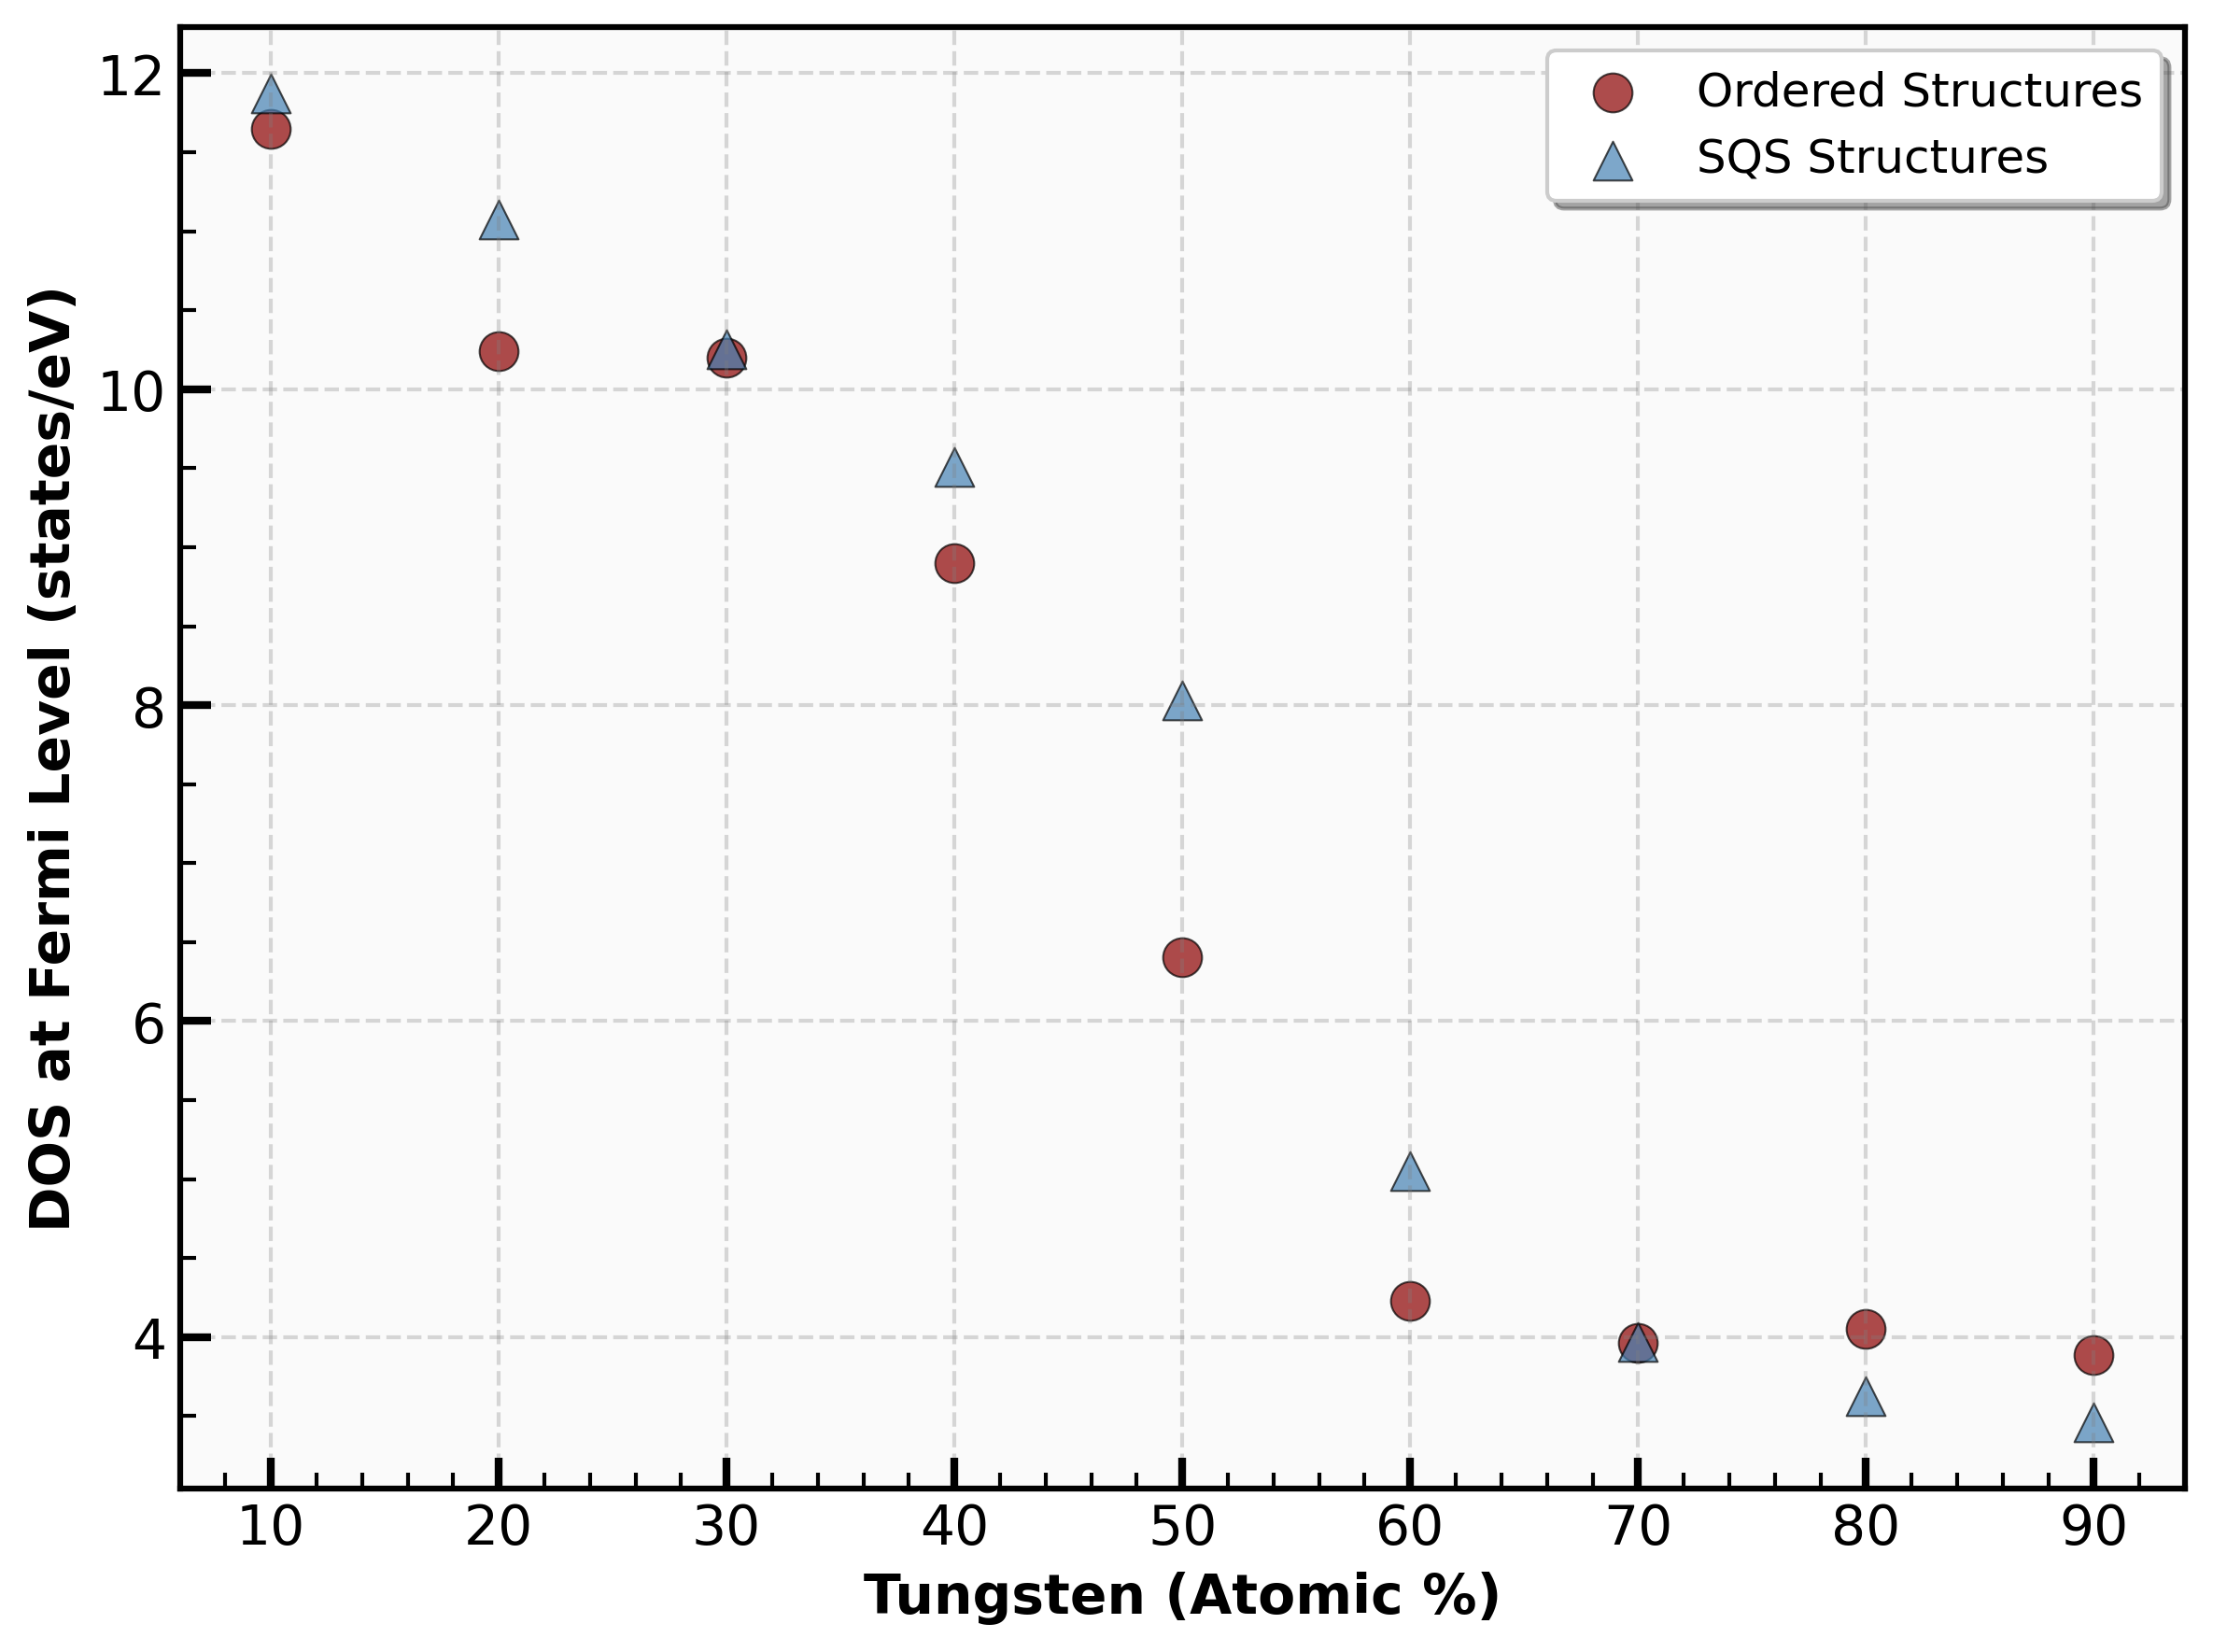

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=300)

# --- Ordered structures ---
scatter_ordered = plt.scatter(ordered_wf_sorted, ordered_dos_sorted, 
            color="darkred", s=100, alpha=0.7, marker='o', 
            edgecolors='black', linewidths=0.5,
            label='Ordered Structures')

# --- SQS structures ---
scatter_sqs = plt.scatter(sqs_wf_sorted, sqs_dos_sorted, 
            color="steelblue", s=100, alpha=0.7, marker='^', 
            edgecolors='black', linewidths=0.5,
            label='SQS Structures')

# Labels
plt.xlabel("Tungsten (Atomic %)", fontsize=14, fontweight='bold')
plt.ylabel("DOS at Fermi Level (states/eV)", fontsize=14, fontweight='bold')

# Ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis="both", which="major", direction="in", width=2, length=8, labelsize=14)
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=4)

# Grid and background
plt.grid(True, linestyle="--", alpha=0.3, color='gray', linewidth=1)
plt.minorticks_on()
plt.gca().set_facecolor('#fafafa')

# Frame styling
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# Axis limits with margins
all_wf = np.concatenate([sqs_wf_sorted, ordered_wf_sorted])
all_dos = np.concatenate([sqs_dos_sorted, ordered_dos_sorted])
x_margin = (all_wf.max() - all_wf.min()) * 0.05
y_margin = (all_dos.max() - all_dos.min()) * 0.05
plt.xlim(all_wf.min() - x_margin, all_wf.max() + x_margin)
plt.ylim(all_dos.min() - y_margin, all_dos.max() + y_margin)

# Fancy legend
plt.legend(handles=[scatter_ordered, scatter_sqs], 
           fontsize=12, frameon=True, fancybox=True, shadow=True, loc='upper right')

plt.tight_layout()
plt.show()
# plt.savefig("combined_dos_vs_w_fraction_scatter.png", dpi=300, bbox_inches="tight")


In [7]:
import numpy as np
# Convert array to dictionary
data_array = np.array([[0.9       , 0.48842478],
                      [0.7       , 0.43784302],
                      [0.6       , 0.37176255],
                      [0.5       , 0.29451655],
                      [0.4       , 0.28872875],
                      [0.3       , 0.30996744],
                      [0.2       , 0.33207531],
                      [0.1       , 0.33763267],
                      [0.8       , 0.46687512]])

# Create dictionary with W fraction as key and Pugh ratio as value
w_pugh_dict = {row[0]: row[1] for row in data_array}

# Sort by W fraction (keys)
w_pugh_dict_sorted = dict(sorted(w_pugh_dict.items(), key=lambda x: x[0]))

print(w_pugh_dict_sorted)

{np.float64(0.1): np.float64(0.33763267), np.float64(0.2): np.float64(0.33207531), np.float64(0.3): np.float64(0.30996744), np.float64(0.4): np.float64(0.28872875), np.float64(0.5): np.float64(0.29451655), np.float64(0.6): np.float64(0.37176255), np.float64(0.7): np.float64(0.43784302), np.float64(0.8): np.float64(0.46687512), np.float64(0.9): np.float64(0.48842478)}


In [8]:
# Or convert to numpy array and multiply:
np.array(list(w_pugh_dict_sorted.keys())) * 100, np.array(list(w_pugh_dict_sorted.values()))

(array([10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 array([0.33763267, 0.33207531, 0.30996744, 0.28872875, 0.29451655,
        0.37176255, 0.43784302, 0.46687512, 0.48842478]))

Text(0, 0.5, '$(C_{11} - C_{12})/2$ Shear (GPa)')

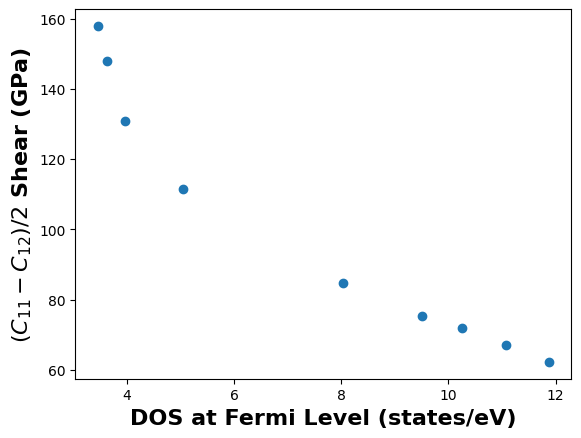

In [9]:
plt.scatter(sqs_dos_sorted, np.array([ 62.276205,  67.17477 ,  71.92235 ,  75.23275 ,  84.668575,
       111.58044 , 130.84424 , 147.794215, 157.91081 ]))
plt.xlabel("DOS at Fermi Level (states/eV)", fontsize=16, fontweight='bold')
plt.ylabel("$(C_{11} - C_{12})/2$ Shear (GPa)", fontsize=16, fontweight='bold')

Text(0.5, 0, '$(C_{11} - C_{12})/2K$ Shear (GPa)')

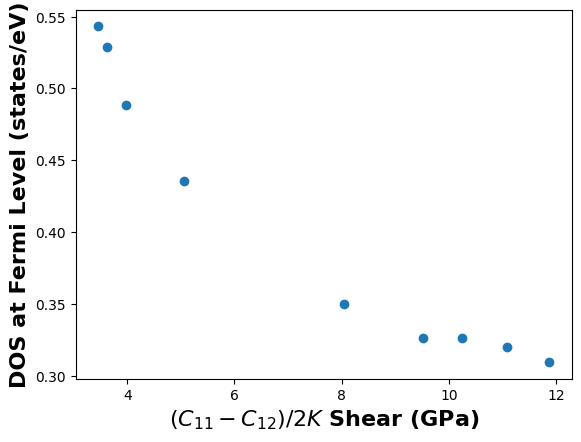

In [10]:
plt.scatter(sqs_dos_sorted, np.array([0.30941686, 0.31974194, 0.32610441, 0.32615475, 0.34965427,
       0.43568469, 0.48830741, 0.52908806, 0.54319631]), )
plt.ylabel("DOS at Fermi Level (states/eV)", fontsize=16, fontweight='bold')
plt.xlabel("$(C_{11} - C_{12})/2K$ Shear (GPa)", fontsize=16, fontweight='bold')

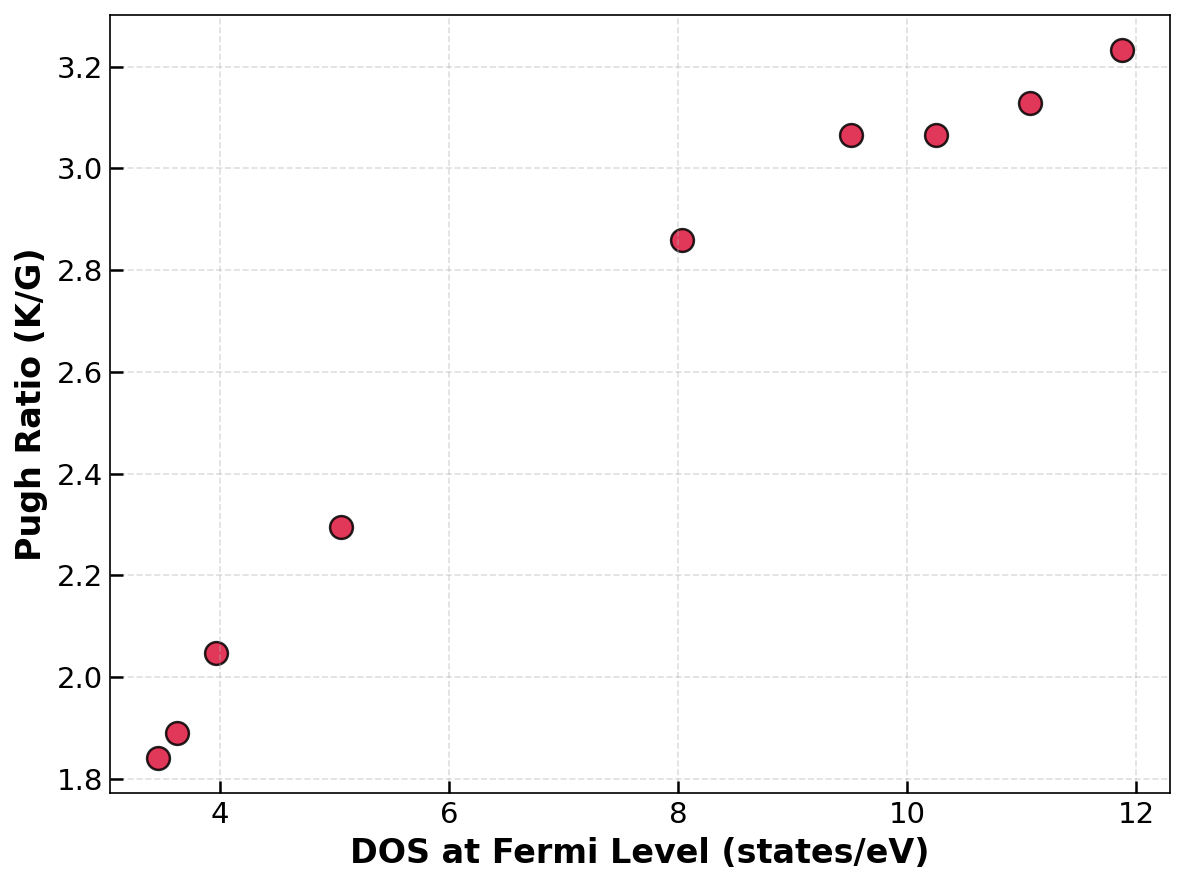

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = sqs_dos_sorted
# y = np.array([62.276205, 67.17477, 71.92235, 75.23275, 84.668575,
#               111.58044, 130.84424, 147.794215, 157.91081])
y = 1/np.array([0.30941686, 0.31974194, 0.32610441, 0.32615475, 0.34965427,
       0.43568469, 0.48830741, 0.52908806, 0.54319631])

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# --- Scatter plot ---
plt.scatter(
    x, y,
    color='crimson',
    s=120,
    alpha=0.85,
    edgecolor='black',
    linewidth=1.2,
    marker='o',
    label='SQS structures'
)

# --- Optional: Fit a simple linear regression for trend visualization ---
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x, p(x), color='black', linestyle='--', linewidth=1.5, label=f"Fit: y = {z[0]:.2f}x + {z[1]:.1f}")

# --- Labels and title ---
plt.xlabel("DOS at Fermi Level (states/eV)", fontsize=16, fontweight='bold')
plt.ylabel(r"$(C_{11} - C_{12})/2$ Shear (GPa)", fontsize=16, fontweight='bold')

plt.ylabel(r"Pugh Ratio (K/G)", fontsize=16, fontweight='bold')
# plt.title("Shear Modulus vs DOS at Fermi Level", fontsize=18, fontweight='bold', pad=15)

# --- Axes and ticks ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2)

# --- Grid and legend ---
plt.grid(True, linestyle='--', alpha=0.4)
# plt.legend(fontsize=13, frameon=False, loc='upper right')

# --- Margins and layout ---
plt.margins(x=0.05, y=0.05)
plt.tight_layout()

plt.show()
